# 비만인과 각 질병들의 상관관계

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [3]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)
심장질환 = pd.read_csv(
    "./심장질환.csv"
)

# 비만 상태에 따른 간질환 여부

In [5]:
df = 검진정보.groupby(["비만정도","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

# 비만정도 - 간질환
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

## 정상체중이면 간질환이 있을까?

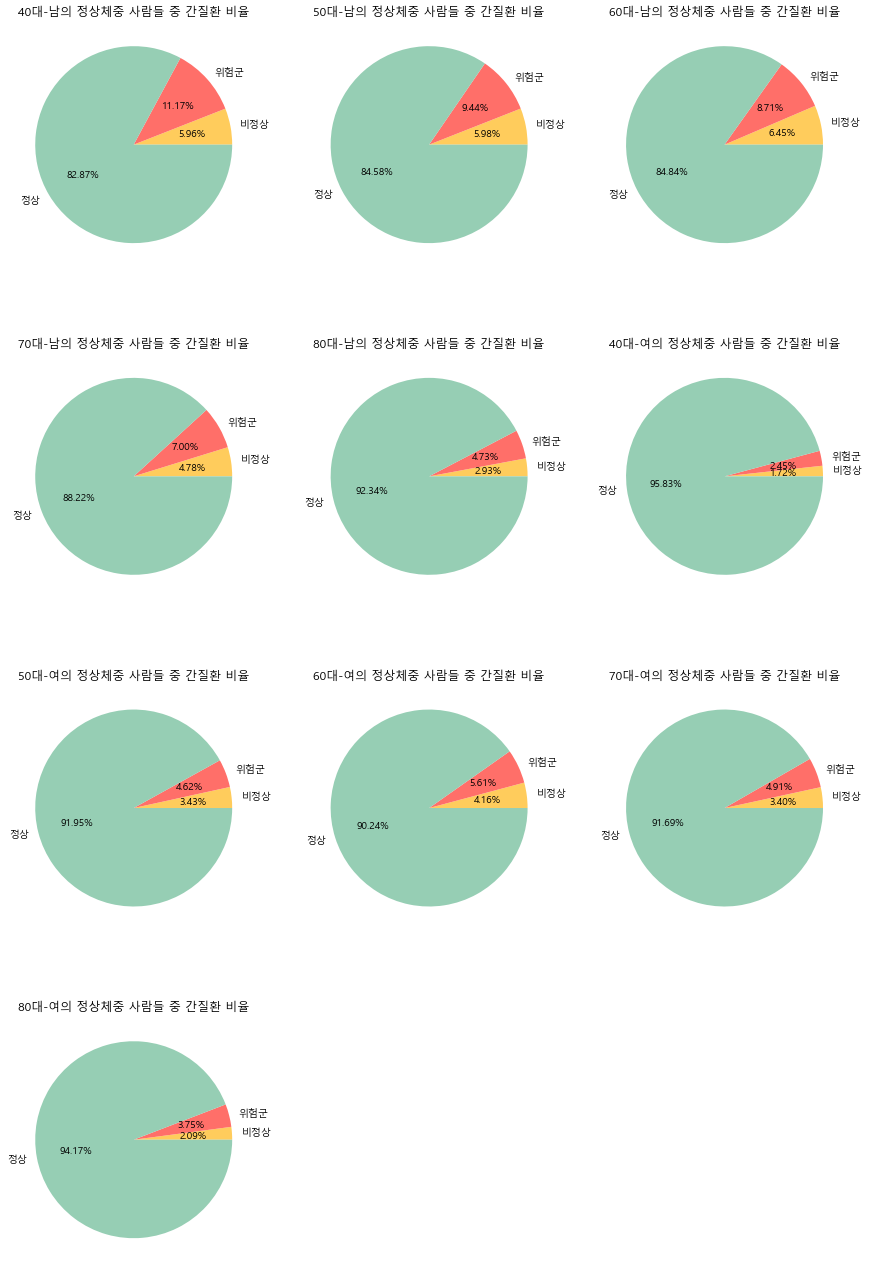

In [9]:
#정상체중이면 간질환이 있을까?

df = 검진정보.groupby(["비만정도","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)


index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 정상체중 사람들 중 간질환 비율')
    j += 1

plt.show()

## 과체중이면 간질환이 있을까?

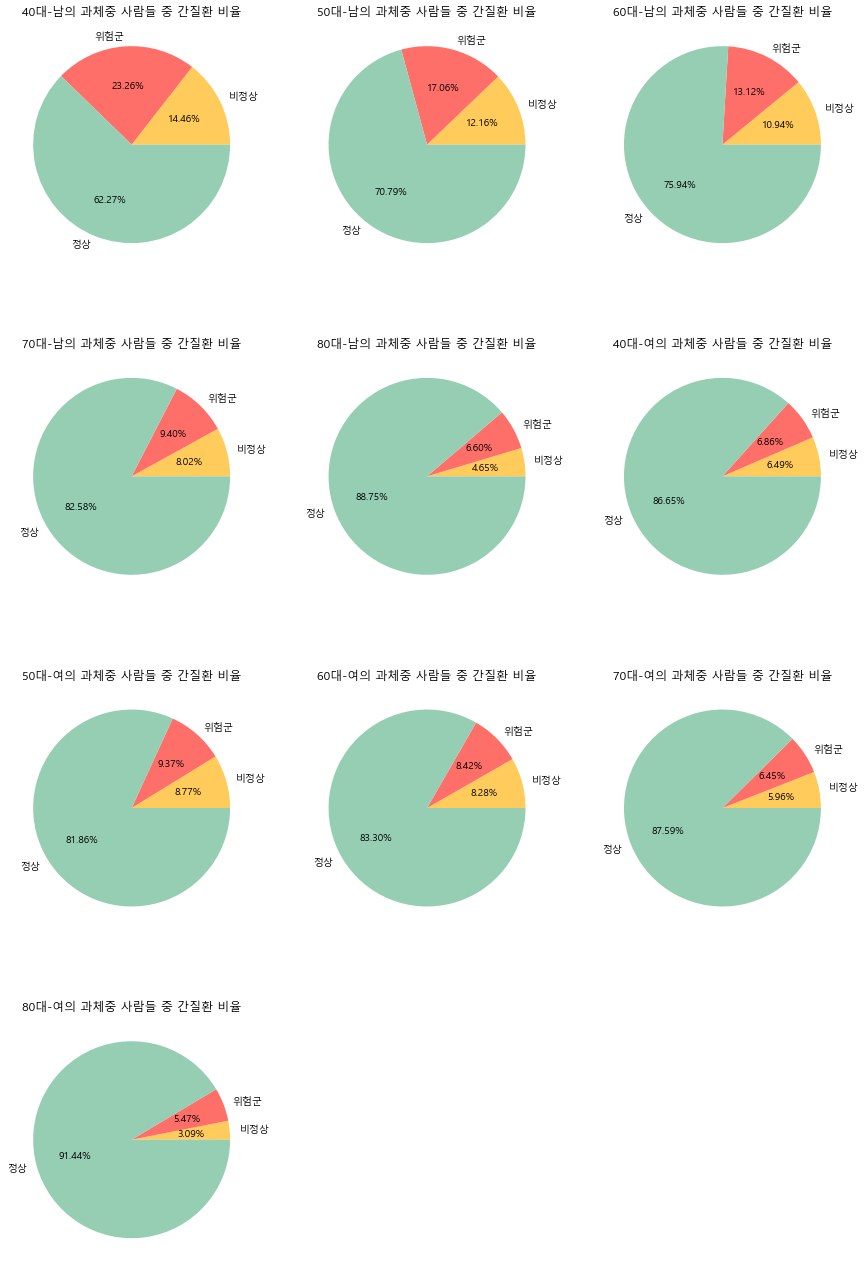

In [8]:
#과체중이면 간질환이 있을까?

df = 검진정보.groupby(["비만정도","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='정상'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='위험체중'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 과체중 사람들 중 간질환 비율')
    j += 1

plt.show()

### 과체중일수록 간장질환일 확률이 높음

# 비만정도에 따른 고혈압 여부

In [12]:
df = 검진정보.groupby(["비만정도","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

# 혈압상태 - 비만여부
# 비만여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('혈압:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c', '#96ceb4', '#e377c2','#17becf'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 정상체중이면 고혈압이 있을까?

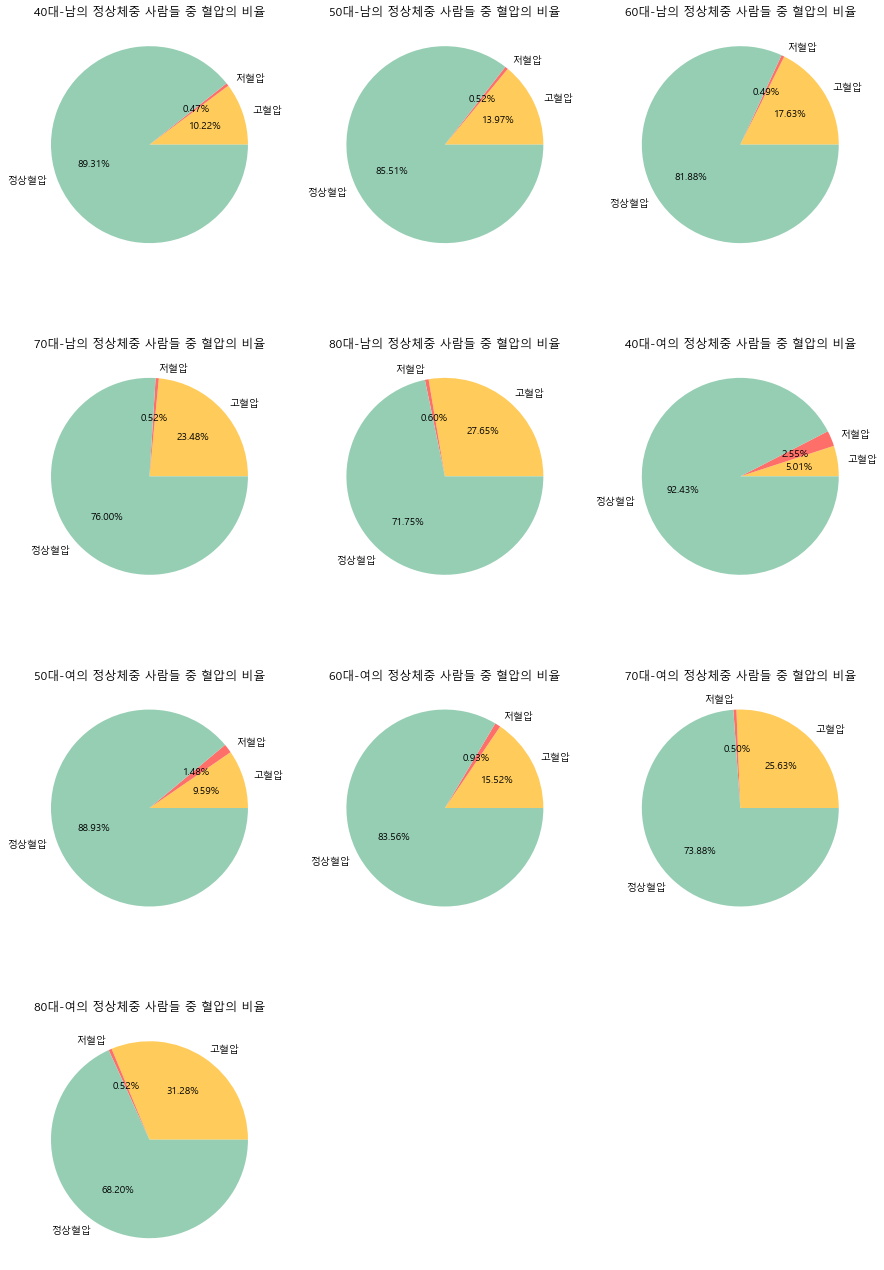

In [15]:
df = 검진정보.groupby(["비만정도","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['혈압'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['혈압'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 정상체중 사람들 중 혈압의 비율')
    j += 1

plt.show()

# 과체중이면 고혈압이 있을까?

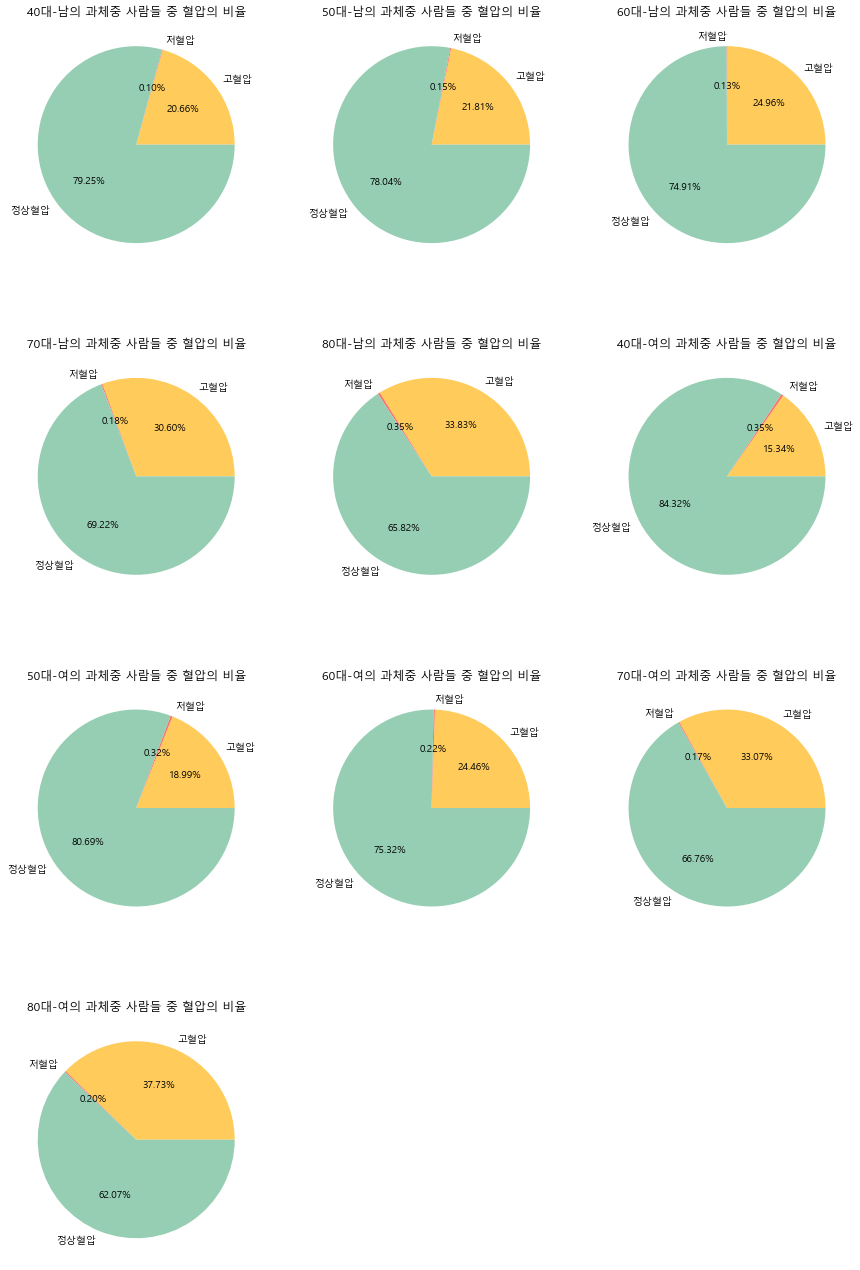

In [16]:
df = 검진정보.groupby(["비만정도","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='정상'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='위험체중'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['혈압'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['혈압'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 과체중 사람들 중 혈압의 비율')
    j += 1

plt.show()

### 고혈압 의심환자는 비만율이 높음 

- 지방이 많으면 그 지방조직에 공급되어야 할 여분의 혈액이 필요  
- 비만에 따른 신경 호르몬의 변화가 고혈압을 일으키도록 유도

# 비만정도에 따른 당뇨병 여부

In [17]:
df = 검진정보.groupby(["비만정도","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

# 비만정도 - 당뇨여부
# 당뇨여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('비만정도:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 정상체중은 당뇨일까?

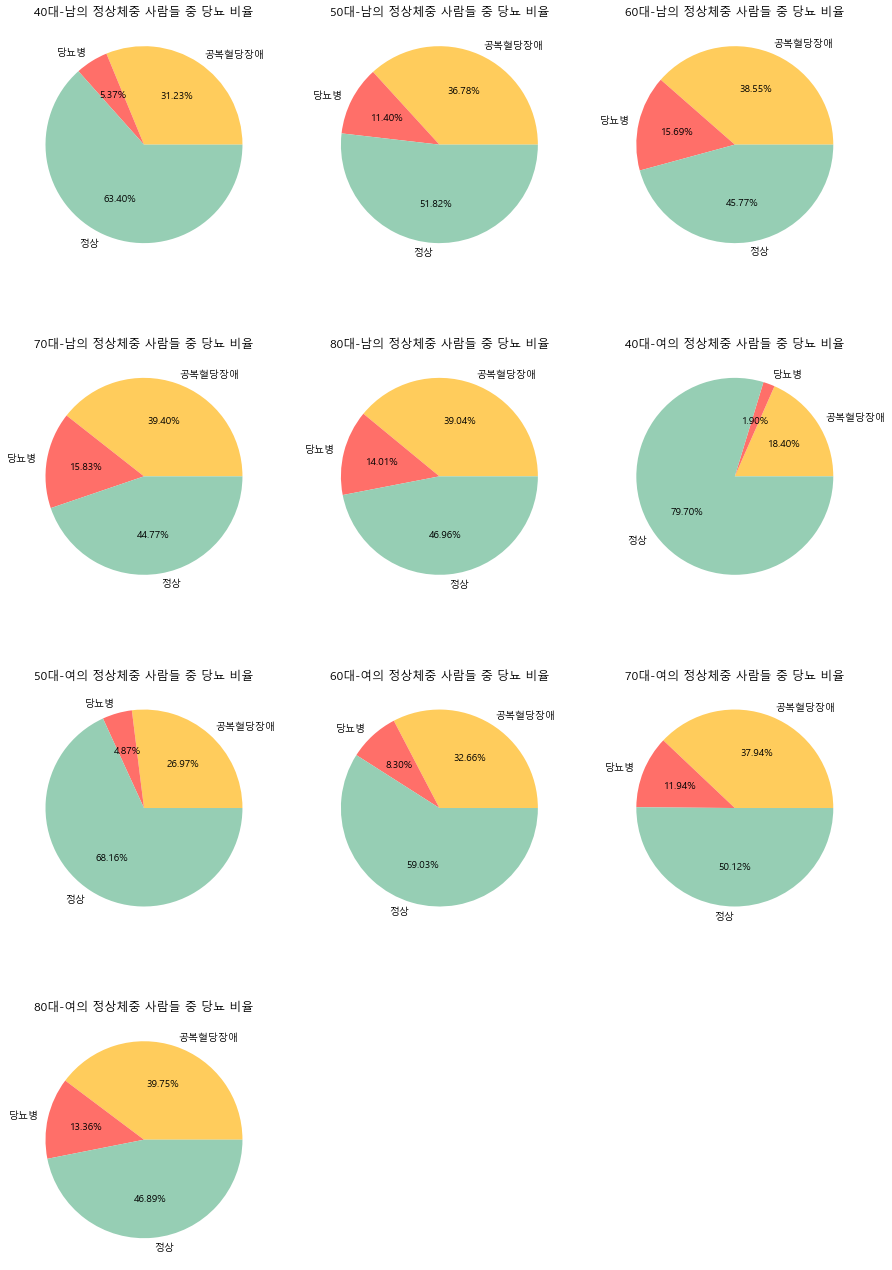

In [18]:
df = 검진정보.groupby(["비만정도","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='1단계 비만'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='2단계 비만'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 정상체중 사람들 중 당뇨 비율')
    j += 1

plt.show()

# 비만 환자는 당뇨일까?

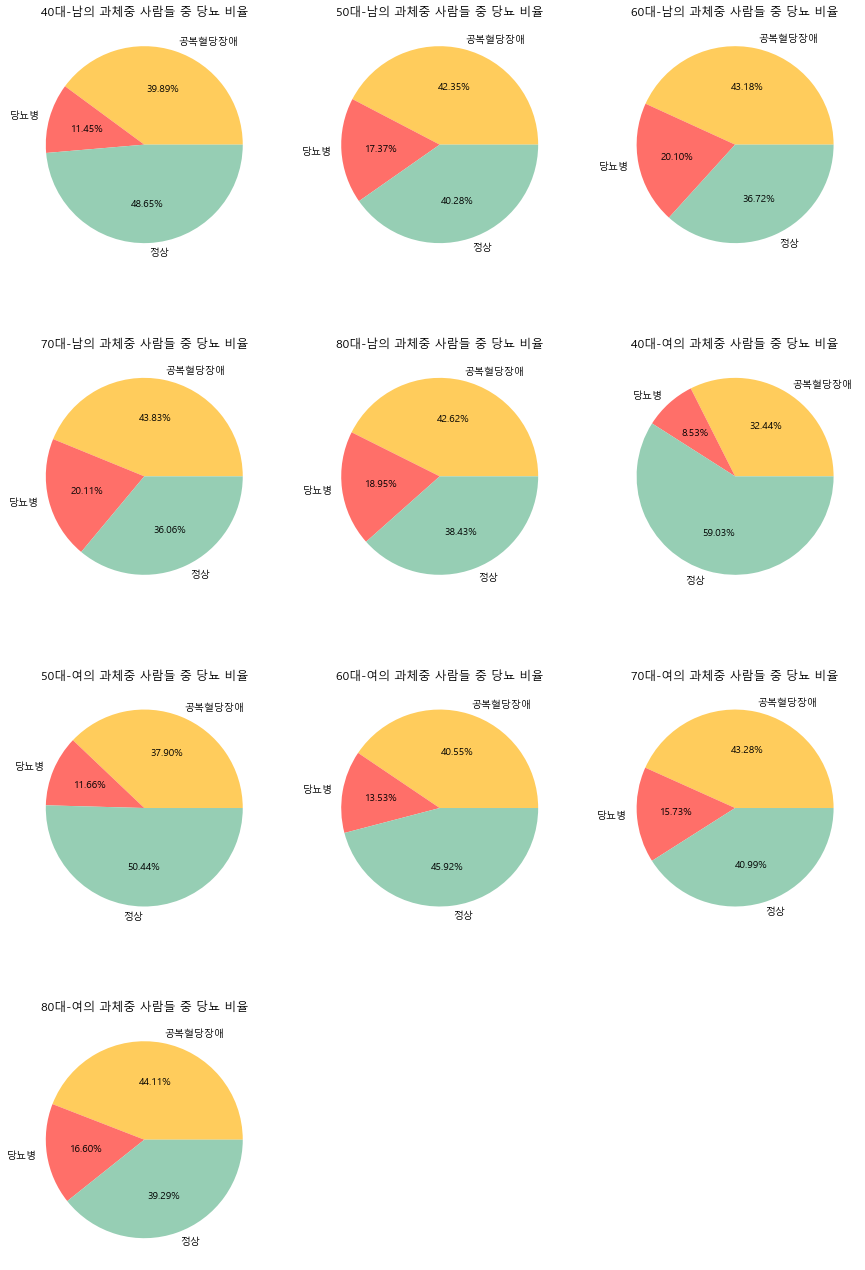

In [19]:
df = 검진정보.groupby(["비만정도","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['비만정도'] =='저체중'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='정상'].index
df.drop(index, inplace=True)
index = df[df['비만정도'] =='위험체중'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+'의 과체중 사람들 중 당뇨 비율')
    j += 1

plt.show()

### 과체중일수록 공복혈당장애 및 당뇨병을 가지고 있을 확률이 높음

- 남녀 모두에서 신체비만지수가 증가할수록 제 2형 당뇨병의 유병률이 증가